In [11]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np
import pandas as pd
import itertools
import cv2
import shutil
import json
from PIL import Image
import requests
from matplotlib import pyplot as plt

In [12]:
df_train = pd.read_csv(r'D:\all_data\train\radiologytraindata.csv', delimiter=',')
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

captions=r"D:\all_data\train\radiology\captions.txt"

There are 65450 rows and 3 columns


In [13]:
df_train.head()

,id,name,caption
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...


In [14]:
df_train.tail()

,id,name,caption
65445,ROCO_81819,PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg,Initial CT abdomen with contrast showing a di...
65446,ROCO_81820,PMC5487234_rb-50-03-0190-g13.jpg,44-year-old male patient after surgical amput...
65447,ROCO_81821,PMC2974222_kjr-11-612-g001.jpg,Primary pulmonary tuberculosis in 18-year-old...
65448,ROCO_81822,PMC3532764_AJNS-7-151-g002.jpg,"MRI brain with gadolinium, coronal view, show..."
65449,ROCO_81823,PMC3509000_pone.0050319.g002.jpg,Contrast-enhanced 3D MRL image of the lower e...


In [15]:
img_dir=r"D:\all_data\test\radiology\images"

In [16]:
image_files=[f for f in os.listdir(img_dir) if f.endswith(".jpg")]

In [17]:
img_path=os.path.join(img_dir,image_files[90])

In [18]:
print(img_path)

D:\all_data\test\radiology\images\PMC1810518_1471-2369-8-5-4.jpg


In [19]:
img=cv2.imread(img_path)
img

array([[[34, 34, 34],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [24, 24, 24],
        [26, 26, 26],
        [28, 28, 28]],

       [[31, 31, 31],
        [23, 23, 23],
        [21, 21, 21],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [27, 27, 27]],

       [[27, 27, 27],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [26, 26, 26]],

       ...,

       [[31, 31, 31],
        [26, 26, 26],
        [21, 21, 21],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [30, 30, 30]],

       [[24, 24, 24],
        [23, 23, 23],
        [29, 29, 29],
        ...,
        [24, 24, 24],
        [25, 25, 25],
        [29, 29, 29]],

       [[32, 32, 32],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [29, 29, 29]]], dtype=uint8)

In [20]:
img.shape

(413, 600, 3)

In [21]:
target_size=(224,224)
cv2.resize(img,target_size)

array([[[ 26,  26,  26],
        [ 47,  47,  47],
        [ 28,  28,  28],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 26,  26,  26]],

       [[ 30,  30,  30],
        [177, 177, 177],
        [ 73,  73,  73],
        ...,
        [ 20,  20,  20],
        [ 21,  21,  21],
        [ 25,  25,  25]],

       [[ 27,  27,  27],
        [182, 182, 182],
        [232, 232, 232],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 25,  25,  25]],

       ...,

       [[ 28,  28,  28],
        [ 29,  29,  29],
        [252, 252, 252],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 27,  27,  27]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [223, 223, 223],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 27,  27,  27]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 45,  45,  45],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 25,  25,  25]]

In [22]:
img_processed=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_processed

array([[34, 26, 27, ..., 24, 26, 28],
       [31, 23, 21, ..., 23, 25, 27],
       [27, 29, 28, ..., 23, 25, 26],
       ...,
       [31, 26, 21, ..., 26, 26, 30],
       [24, 23, 29, ..., 24, 25, 29],
       [32, 25, 25, ..., 24, 24, 29]], dtype=uint8)

In [23]:
img_normalised=img/255

In [24]:
img_normalised

array([[[0.13333333, 0.13333333, 0.13333333],
        [0.10196078, 0.10196078, 0.10196078],
        [0.10588235, 0.10588235, 0.10588235],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.10196078, 0.10196078, 0.10196078],
        [0.10980392, 0.10980392, 0.10980392]],

       [[0.12156863, 0.12156863, 0.12156863],
        [0.09019608, 0.09019608, 0.09019608],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10588235, 0.10588235, 0.10588235]],

       [[0.10588235, 0.10588235, 0.10588235],
        [0.11372549, 0.11372549, 0.11372549],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10196078, 0.10196078, 0.10196078]],

       ...,

       [[0.12156863, 0.12156863, 0.12156863],
        [0.10196078, 0.10196078, 0.10196078],
        [0.08235294, 0

In [25]:
img_normalised=img/255
img_normalised

array([[[0.13333333, 0.13333333, 0.13333333],
        [0.10196078, 0.10196078, 0.10196078],
        [0.10588235, 0.10588235, 0.10588235],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.10196078, 0.10196078, 0.10196078],
        [0.10980392, 0.10980392, 0.10980392]],

       [[0.12156863, 0.12156863, 0.12156863],
        [0.09019608, 0.09019608, 0.09019608],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10588235, 0.10588235, 0.10588235]],

       [[0.10588235, 0.10588235, 0.10588235],
        [0.11372549, 0.11372549, 0.11372549],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.09803922, 0.09803922, 0.09803922],
        [0.10196078, 0.10196078, 0.10196078]],

       ...,

       [[0.12156863, 0.12156863, 0.12156863],
        [0.10196078, 0.10196078, 0.10196078],
        [0.08235294, 0

In [26]:
# Optional: Apply histogram equalization and denoising
img_eq = cv2.equalizeHist(img_processed.squeeze())
print(f"Equalized Image (first 5 pixels): {img_eq[:5, :5]}")

img_denoised = cv2.GaussianBlur(img_eq, (5, 5), 0)
print(f"Denoised Image (first 5 pixels): {img_denoised[:5, :5]}")

Equalized Image (first 5 pixels): [[ 39  27  30  23   9]
 [ 37  16   9  44 110]
 [ 30  34  32 110 237]
 [ 36  39  37 109 242]
 [ 38  27  40 123 242]]
Denoised Image (first 5 pixels): [[ 27  27  32  51  70]
 [ 28  29  39  68  96]
 [ 31  34  54 102 148]
 [ 34  39  65 124 182]
 [ 35  40  68 130 193]]


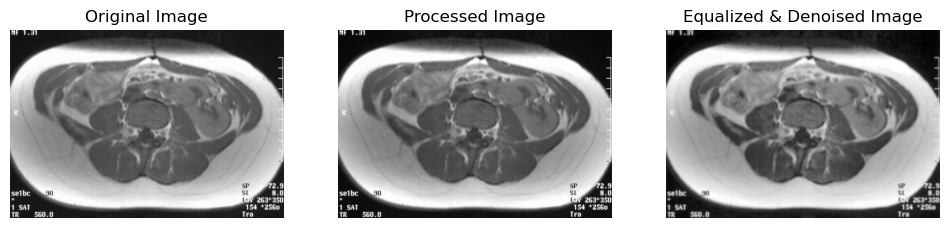

In [27]:
# Visualize the original, preprocessed, and denoised images

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
img_original = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed Image (Grayscale & Normalized)
plt.subplot(1, 3, 2)
plt.imshow(img_processed.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Equalized and Denoised Image (Optional)
plt.subplot(1, 3, 3)
plt.imshow(img_denoised, cmap='gray')
plt.title('Equalized & Denoised Image')
plt.axis('off')

plt.show()


In [28]:
img_path1=os.path.join(img_dir,image_files[4444])
print(img_path1)

D:\all_data\test\radiology\images\PMC4352358_ccr30003-0084-f1.jpg


In [29]:
img1=cv2.imread(img_path1)
img1

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  3,   3,   3],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  3,   3,   3],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  3,   3,   3],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [30]:
target_size=(224,224)
cv2.resize(img1,target_size)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [31]:
img_processed1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

In [32]:
img_normalised1 = img1/255
img_normalised1

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0

In [33]:
# Applying histogram equalization and denoising

img_eq1 = cv2.equalizeHist(img_processed1.squeeze())
print(f"Equalized Image (first 5 pixels): {img_eq1[:5, :5]}")

img_denoised1 = cv2.GaussianBlur(img_eq1, (5, 5), 0)
print(f"Denoised Image (first 5 pixels): {img_denoised1[:5, :5]}")

Equalized Image (first 5 pixels): [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Denoised Image (first 5 pixels): [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


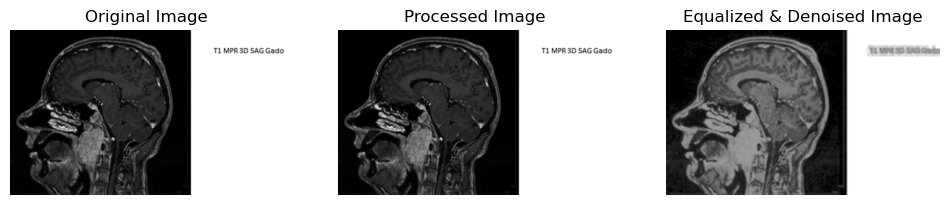

In [34]:
# Visualize the original, preprocessed, and denoised images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
img_original1 = cv2.imread(img_path1)
plt.imshow(cv2.cvtColor(img_original1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed Image (Grayscale & Normalized)
plt.subplot(1, 3, 2)
plt.imshow(img_processed1.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Equalized and Denoised Image (Optional)
plt.subplot(1, 3, 3)
plt.imshow(img_denoised1, cmap='gray')
plt.title('Equalized & Denoised Image')
plt.axis('off')

plt.show()
     


# NLP PREPROCESSING TECHNIQUES

In [35]:
# Define paths for each split (train, test, validation) and categories (radiology, non-radiology)
base_dir = r'D:\all_data'

# Define the splits and categories
splits = ['train', 'test', 'validation']
categories = ['radiology', 'non-radiology']

# Initialize an empty list to store the data
data = []

# Loop through each split and category to read captions
for split in splits:
    for category in categories:
        # Define paths for images and captions.txt
        category_dir = os.path.join(base_dir, split, category)
        captions_file = os.path.join(category_dir, 'captions.txt')
        
        # Read the captions file if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the captions file
                for line in file:
                    image_id = line[:12]    # Assuming the first 12 characters are the image ID
                    caption = line[12:].strip()  # The rest of the line is the caption text
                    label = category  # Set label as 'radiology' or 'non-radiology'
                    
                    # Append to data list with image ID, caption, label, and split type
                    data.append([image_id, caption, label, split])

# Create a DataFrame with the collected data
df = pd.DataFrame(data, columns=['image_id', 'caption', 'label', 'split'])

# Display the first few rows of the DataFrame to verify
df

,image_id,caption,label,split
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train
...,...,...,...,...
87922,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation
87923,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation
87924,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation
87925,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation


In [36]:
captions = " ".join(df['caption'])
print(captions[:500])

Computed tomography scan in axial view showing obliteration of the left maxillary sinus Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month. The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows 


In [37]:
captions=captions.lower()

In [38]:
from nltk.corpus import stopwords

In [39]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop_words=set(stopwords.words('english'))

In [41]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [47]:
text_input = " ".join([word.lower() for word in captions.split() if word.lower() not in stop_words][:500])

In [43]:
print(text_input)

computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month. patient residual paralysis hand poliomyelitis. necessary stabilize thumb reference index finger. accomplished placing graft bone bank first second metacarpals. roentgenogram shows complete healing graft one year later. panoramic radiograph immediate loading. plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm. 3-year-old child visual difficulties. axial flair image show supra-sellar lesion extending temporal lobes along optic tracts (arrows) moderate mass effect, compatible optic glioma. flair hyperintensity also noted left mesencephalon additional tumoral involvement showing subtrochanteric fracture porotic bone. post orthodontic treatment. root canal therapy done maxillary incisors two sequential thrombi distal segment obtuse marginal 2 (om2). example mri i

In [44]:
!pip install textblob


In [45]:
from textblob import TextBlob
TextBlob(text_input).correct()

TextBlob("computer cosmography scan animal view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month. patient residual paralysis hand poliomyelitis. necessary stability thumb reference index finger. accomplished placing graft bone bank first second metacarpals. roentgenogram shows complete healing graft one year later. panorama radiogram immediate loading. plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm. 3-year-old child visual difficulties. animal flair image show supra-cellar lesion extending temporal loves along optic tracts (arrows) moderate mass effect, compatible optic glioma. flair hyperintensity also noted left mesencephalon additional moral involvement showing subtrochanteric fracture poetic bone. post orthodontic treatment. root canal therapy done maxillary incisors two sequential thrombi distal segment abuse marginal 2 (om). example

# Tokenizer

In [3]:
!pip install nltk

In [46]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
sent_tokenize(text_input)

['computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month.',
 'patient residual paralysis hand poliomyelitis.',
 'necessary stabilize thumb reference index finger.',
 'accomplished placing graft bone bank first second metacarpals.',
 'roentgenogram shows complete healing graft one year later.',
 'panoramic radiograph immediate loading.',
 'plain abdomen x-ray: multiple air levels mid-abdomen (arrows), radiopaque shadow, air diaphragm.',
 '3-year-old child visual difficulties.',
 'axial flair image show supra-sellar lesion extending temporal lobes along optic tracts (arrows) moderate mass effect, compatible optic glioma.',
 'flair hyperintensity also noted left mesencephalon additional tumoral involvement showing subtrochanteric fracture porotic bone.',
 'post orthodontic treatment.',
 'root canal therapy done maxillary incisors two sequential thrombi distal 

In [49]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(text_input)

['computed',
 'tomography',
 'scan',
 'axial',
 'view',
 'showing',
 'obliteration',
 'left',
 'maxillary',
 'sinus',
 'bacterial',
 'contamination',
 'occurred',
 'completion',
 'root',
 'canal',
 'treatment',
 'tooth',
 ',',
 'remained',
 'temporary',
 'filling',
 '15',
 'month',
 '.',
 'patient',
 'residual',
 'paralysis',
 'hand',
 'poliomyelitis',
 '.',
 'necessary',
 'stabilize',
 'thumb',
 'reference',
 'index',
 'finger',
 '.',
 'accomplished',
 'placing',
 'graft',
 'bone',
 'bank',
 'first',
 'second',
 'metacarpals',
 '.',
 'roentgenogram',
 'shows',
 'complete',
 'healing',
 'graft',
 'one',
 'year',
 'later',
 '.',
 'panoramic',
 'radiograph',
 'immediate',
 'loading',
 '.',
 'plain',
 'abdomen',
 'x',
 '-',
 'ray',
 ':',
 'multiple',
 'air',
 'levels',
 'mid',
 '-',
 'abdomen',
 '(',
 'arrows',
 '),',
 'radiopaque',
 'shadow',
 ',',
 'air',
 'diaphragm',
 '.',
 '3',
 '-',
 'year',
 '-',
 'old',
 'child',
 'visual',
 'difficulties',
 '.',
 'axial',
 'flair',
 'image',
 'sh

In [50]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tokenizer.tokenize(text_input)

['computed',
 'tomography',
 'scan',
 'axial',
 'view',
 'showing',
 'obliteration',
 'left',
 'maxillary',
 'sinus',
 'bacterial',
 'contamination',
 'occurred',
 'completion',
 'root',
 'canal',
 'treatment',
 'tooth',
 ',',
 'remained',
 'temporary',
 'filling',
 '15',
 'month.',
 'patient',
 'residual',
 'paralysis',
 'hand',
 'poliomyelitis.',
 'necessary',
 'stabilize',
 'thumb',
 'reference',
 'index',
 'finger.',
 'accomplished',
 'placing',
 'graft',
 'bone',
 'bank',
 'first',
 'second',
 'metacarpals.',
 'roentgenogram',
 'shows',
 'complete',
 'healing',
 'graft',
 'one',
 'year',
 'later.',
 'panoramic',
 'radiograph',
 'immediate',
 'loading.',
 'plain',
 'abdomen',
 'x-ray',
 ':',
 'multiple',
 'air',
 'levels',
 'mid-abdomen',
 '(',
 'arrows',
 ')',
 ',',
 'radiopaque',
 'shadow',
 ',',
 'air',
 'diaphragm.',
 '3-year-old',
 'child',
 'visual',
 'difficulties.',
 'axial',
 'flair',
 'image',
 'show',
 'supra-sellar',
 'lesion',
 'extending',
 'temporal',
 'lobes',
 'alo

# STEMMING

In [51]:
words=["eating","eats","eaten","writing","writes","programming"]

In [52]:
from nltk.stem import PorterStemmer

In [53]:
stemming=PorterStemmer()

In [54]:
for word in words:
  print(word+"---"+stemming.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


In [55]:
stemming.stem("congratulations")

'congratul'

# REGEX STEMMER

In [56]:
from nltk.stem import RegexpStemmer

In [57]:
reg_stemmer=RegexpStemmer("ing$|e$|s$|able$")

In [58]:
reg_stemmer.stem("playing")

'play'

In [59]:
reg_stemmer.stem("")

''

In [60]:
reg_stemmer.stem("ingeating")

'ingeat'

# SNOWBALL STREAMER

In [61]:
from nltk.stem import SnowballStemmer

In [62]:
snowballstemmer=SnowballStemmer('english')
for word in words:
  print(word+"---"+snowballstemmer.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


In [63]:
stemming.stem("sport"),snowballstemmer.stem("Quickly")

('sport', 'quick')

# LEMMATIZATION

In [64]:
from nltk.stem import WordNetLemmatizer
import nltk

In [65]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
lemmatizer=WordNetLemmatizer()

In [67]:
lemmatizer.lemmatize("corpora",pos="n")

'corpus'

In [48]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dinesh M\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

# Paragraph

In [68]:
paragraph="""This biographical article related to French artistic gymnastics is a stub. You can help Wikipedia by expanding it.
InsideAR was the largest Augmented Reality event in Europe. It was organized and supported by metaio GmbH every year. The first event was held in 2010, had since expanded globally and was run at multiple locations around the world.  However, after Apple purchased metaio in May 2015, metaio cancelled the InsideAR conference 2015 without any statements about the conference's future.
The Fearing Mind is an American horror television series that aired on the Fox Family Channel from October 21 until December 2, 2000.
Bill Fearing, a famous writer of suspense thrillers, gets his ideas from things that happen in his family. When he gets an idea, the viewers enter his mind and see the gruesome events unfold.
It had a bronze barrel and lacked a modern recoil system, using only an ineffective spring-mounted spade brake, and was virtually obsolescent on its introduction. Nonetheless, it was the standard field howitzer for the Austrian Army at the outbreak of the war.
Lithuanian Paralympic Committee (Lithuanian: Lietuvos parolimpinis komitetas) was founded on 1990 and recognized by the International Paralympic Committee after one year.
A GUI may be designed for the requirements of a vertical market as application-specific graphical user interfaces. Examples include automated teller machines (ATM), point of sale (POS) touchscreens at restaurants, self-service checkouts used in a retail store, airline self-ticket and check-in, information kiosks in a public space, like a train station or a museum, and monitors or control screens in an embedded industrial application which employ a real-time operating system (RTOS).
Cell phones and handheld game systems also employ application specific touchscreen GUIs. Newer automobiles use GUIs in their navigation systems and multimedia centers, or navigation multimedia center combinations.
A GUI uses a combination of technologies and devices to provide a platform that users can interact with, for the tasks of gathering and producing information.
A series of elements conforming a visual language have evolved to represent information stored in computers. This makes it easier for people with few computer skills to work with and use computer software. The most common combination of such elements in GUIs is the windows, icons, menus, pointer (WIMP) paradigm, especially in personal computers.
In personal computers, all these elements are modeled through a desktop metaphor to produce a simulation called a desktop environment in which the display represents a desktop, on which documents and folders of documents can be placed. Window managers and other software combine to simulate the desktop environment with varying degrees of realism.
Entries may appear in a list to make space for text and details, or in a grid for compactness and larger icons with little space underneath for text. Variations inbetween exist, such as a list with multiple columns of items and a grid of items with rows of text extending sideways from the icon.
Multi-row and multi-column layouts commonly found on the web are "shelf" and "waterfall". The former is found on image search engines, where images appear with a fixed height but variable length, and is typically implemented with the CSS property and parameter display: inline-block;. A waterfall layout found on Imgur and Tweetdeck with fixed width but variable height per item is usually implemented by specifying column-width:.
Smaller app mobile devices such as personal digital assistants (PDAs) and smartphones typically use the WIMP elements with different unifying metaphors, due to constraints in space and available input devices. Applications for which WIMP is not well suited may use newer interaction techniques, collectively termed post-WIMP user interfaces.
As of 2011, some touchscreen-based operating systems such as Apple's iOS (iPhone) and Android use the class of GUIs named post-WIMP. These support styles of interaction using more than one finger in contact with a display, which allows actions such as pinching and rotating, which are unsupported by one pointer and mouse.
Human interface devices, for the efficient interaction with a GUI include a computer keyboard, especially used together with keyboard shortcuts, pointing devices for the cursor (or rather pointer) control: mouse, pointing stick, touchpad, trackball, joystick, virtual keyboards, and head-up displays (translucent information devices at the eye level).
There are also actions performed by programs that affect the GUI. For example, there are components like inotify or D-Bus to facilitate communication between computer programs.
GUIs were a hot topic in the early 1980s. The Apple Lisa was released in 1983, and various windowing systems existed for DOS operating systems (including PC GEM and PC/GEOS). Individual applications for many platforms presented their own GUI variants. Despite the GUIs advantages, many reviewers questioned the value of the entire concept, citing hardware limits, and problems in finding compatible software.
In 1984, Apple released a television commercial which introduced the Apple Macintosh during the telecast of Super Bowl XVIII by CBS, with allusions to George Orwell's noted novel Nineteen Eighty-Four. The goal of the commercial was to make people think about computers, identifying the user-friendly interface as a personal computer which departed from prior business-oriented systems, and becoming a signature representation of Apple products.
Windows 95, accompanied by an extensive marketing campaign, was a major success in the marketplace at launch and shortly became the most popular desktop operating system.
In 2007, with the iPhone and later in 2010 with the introduction of the iPad,  Apple popularized the post-WIMP style of interaction for multi-touch screens, and those devices were considered to be milestones in the development of mobile devices.
The GUIs familiar to most people as of the mid-late 2010s are Microsoft Windows, macOS, and the X Window System interfaces for desktop and laptop computers, and Android, Apple's iOS, Symbian, BlackBerry OS, Windows Phone/Windows 10 Mobile, Tizen, WebOS, and Firefox OS for handheld (smartphone) devices.[citation needed]
GUIs can be made quite hard when dialogs are buried deep in a system or moved about to different places during redesigns. Also, icons and dialog boxes are usually harder for users to script.
WIMPs extensively use modes, as the meaning of all keys and clicks on specific positions on the screen are redefined all the time. Command-line interfaces use modes only in limited forms, such as for current directory and environment variables.
Most modern operating systems provide both a GUI and some level of a CLI, although the GUIs usually receive more attention. The GUI is usually WIMP-based, although occasionally other metaphors surface, such as those used in Microsoft Bob, 3dwm, or File System Visualizer.
Several attempts have been made to create a multi-user three-dimensional environment or 3D GUI, including Sun's Project Looking Glass, Metisse, which was similar to Project Looking Glass, BumpTop, where users can manipulate documents and windows with realistic movement and physics as if they were physical documents, and the Croquet Project, which moved to the Open Cobalt and Open Croquet efforts.
The zooming user interface (ZUI) is a related technology that promises to deliver the representation benefits of 3D environments without their usability drawbacks of orientation problems and hidden objects. It is a logical advance on the GUI, blending some three-dimensional movement with two-dimensional or 2.5D vector objects. In 2006, Hillcrest Labs introduced the first zooming user interface for television.
Some environments use the methods of 3D graphics to project virtual three-dimensional user interface objects onto the screen. These are often shown in use in science fiction films (see below for examples). As the processing power of computer graphics hardware increases, this becomes less of an obstacle to a smooth user experience.
Three-dimensional graphics are currently mostly used in computer games, art, and computer-aided design (CAD). A three-dimensional computing environment can also be useful in other uses, like molecular graphics, aircraft design and Phase Equilibrium Calculations/Design of unit operations and chemical processes.
Interfaces for the X Window System have also implemented advanced three-dimensional user interfaces through compositing window managers such as Beryl, Compiz and KWin using the AIGLX or XGL architectures, allowing the use of OpenGL to animate user interactions with the desktop.
Giuliani received her first call-up for the senior team as Italy faced Austria in a friendly held on 7 April 2013. She was left out of the squad which took part in the UEFA Women's Euro 2013. She made her debut on 5 April 2014 against Spain in a 2015 FIFA Women's World Cup qualification match.
Fishing industry in North Korea provides an important supplement to the diet and for export. The catch in 2001 totaled 200,000 tons of wild-caught seafood and 63,700 tons produced using aquaculture. The major fishing grounds are in the coastal areas of the Sea of Japan to the east and the Yellow Sea to the west. The main fishery ports are Sinpo, Kimchaek, and the nearby deep-sea fishery bases of Yanghwa and Hongwfin. The principal catch from the Sea of Japan is pollock.
North Korea's coastline of about 2,495 kilometers, mixture of warm and cold ocean currents, and many rivers, lakes, and streams make its potential for fishery development better than for most other countries.
The major fishing grounds are in the coastal areas of the Sea of Japan to the east and the Yellow Sea to the west. The principal catch from the Sea of Japan is pollock. Sardine and squid catches are also significant. From the west coast, yellow corvina and hairtail are the most common varieties of fish. Deep-sea catches include herring, mackerel, pike, and yellowtail. Shellfish and mollusks are caught too.
A major expansion of technical schools was undertaken since the 1950s, with specialized courses including fishing. Not until the early 1960s, however, did the domestic fishing industry begin to expand rapidly, receiving increased investment in vessels, equipment, and port facilities. Deep-sea fishing began in earnest in the 1970s.
Total marine products increased from 465,000 tons in 1960 to 1.14 million tons in 1970, registering an annual growth rate of 9.4 percent compared with the planned rate of 14.5 percent. The Six-Year Plan target of 1 .6 million tons was met in 1976.
The catch in 2001 totaled 200,000 tons of wild-caught freshwater and saltwater fish, shellfish, and mollusks and about 63,700 tons produced using aquaculture. The exact numbers of present catches are unknown. Unlike most countries, North Korea does not report its annual catch to the Food and Agriculture Organization (FAO), of which it is a member.
The exact numbers of the fishing fleet, thought to be in poor condition, are not known. In 1998, North Korea had eight large fishing vessels (3,750 displacement tonnage,  2,759 gross tons, 83 m length, 2,250 horsepower) and 1,545 small vessels (485 displacement tonnage,  267 gross tons, 39 m length, 400 horsepower). Numbers of smaller vessels were not reported.
Fish is an important export commodity to North Korea. Fish and seafood are particularly exported to China. The United Nations Security Council sanctions from 2017 banned North Korean exports of seafood. Prior to the ban, North Korean exports of seafood were estimated at US$300 million annually."""


In [69]:
paragraph=paragraph.lower()

In [70]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [72]:
sentences=nltk.sent_tokenize(paragraph)

In [73]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [75]:
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words)

In [76]:
print(sentences)

['biograph articl relat french artist gymnast stub .', 'help wikipedia expand .', 'insidear largest augment realiti event europ .', 'organ support metaio gmbh everi year .', 'first event held 2010 , sinc expand global run multipl locat around world .', "howev , appl purchas metaio may 2015 , metaio cancel insidear confer 2015 without statement confer 's futur .", 'fear mind american horror televis seri air fox famili channel octob 21 decemb 2 , 2000. bill fear , famou writer suspens thriller , get idea thing happen famili .', 'get idea , viewer enter mind see gruesom event unfold .', 'bronz barrel lack modern recoil system , use ineffect spring-mount spade brake , virtual obsolesc introduct .', 'nonetheless , standard field howitz austrian armi outbreak war .', 'lithuanian paralymp committe ( lithuanian : lietuvo parolimpini komiteta ) found 1990 recogn intern paralymp committe one year .', 'gui may design requir vertic market application-specif graphic user interfac .', 'exampl includ

In [64]:
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[snowballstemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words)

In [65]:
sentences

['biograph articl relat french artist gymnast stub .',
 'help wikipedia expand .',
 'insidear largest augment realiti event europ .',
 'organ support metaio gmbh everi year .',
 'first event held 2010 , sinc expand global run multipl locat around world .',
 "howev , appl purcha metaio may 2015 , metaio cancel insidear confer 2015 without statement confer 's futur .",
 'fear mind american horror televi seri air fox famili channel octob 21 decemb 2 , 2000. bill fear , famou writer suspen thriller , get idea thing happen famili .',
 'get idea , viewer enter mind see gruesom event unfold .',
 'bronz barrel lack modern recoil system , use ineffect spring-mount spade brake , virtual obsolesc introduct .',
 'nonetheless , standard field howitz austrian armi outbreak war .',
 'lithuanian paralymp committ ( lithuanian : lietuvo parolimpini komiteta ) found 1990 recogn intern paralymp committ one year .',
 'gui may design requir vertic market application-specif graphic user interfac .',
 'exampl

# Parts of Speech

In [78]:
import nltk
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dinesh M\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [79]:
sentences

['biograph articl relat french artist gymnast stub .',
 'help wikipedia expand .',
 'insidear largest augment realiti event europ .',
 'organ support metaio gmbh everi year .',
 'first event held 2010 , sinc expand global run multipl locat around world .',
 "howev , appl purchas metaio may 2015 , metaio cancel insidear confer 2015 without statement confer 's futur .",
 'fear mind american horror televis seri air fox famili channel octob 21 decemb 2 , 2000. bill fear , famou writer suspens thriller , get idea thing happen famili .',
 'get idea , viewer enter mind see gruesom event unfold .',
 'bronz barrel lack modern recoil system , use ineffect spring-mount spade brake , virtual obsolesc introduct .',
 'nonetheless , standard field howitz austrian armi outbreak war .',
 'lithuanian paralymp committe ( lithuanian : lietuvo parolimpini komiteta ) found 1990 recogn intern paralymp committe one year .',
 'gui may design requir vertic market application-specif graphic user interfac .',
 'e

In [80]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dinesh M\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [81]:
for i in range(len(sentences)):
      words=nltk.word_tokenize(sentences[i])
      pos_tag=nltk.pos_tag(words)
      print(pos_tag)

[('biograph', 'NN'), ('articl', 'NN'), ('relat', 'JJ'), ('french', 'JJ'), ('artist', 'NN'), ('gymnast', 'NN'), ('stub', 'NN'), ('.', '.')]
[('help', 'NN'), ('wikipedia', 'VB'), ('expand', 'NN'), ('.', '.')]
[('insidear', 'RB'), ('largest', 'JJS'), ('augment', 'NN'), ('realiti', 'NN'), ('event', 'NN'), ('europ', 'NN'), ('.', '.')]
[('organ', 'JJ'), ('support', 'NN'), ('metaio', 'NN'), ('gmbh', 'NN'), ('everi', 'JJ'), ('year', 'NN'), ('.', '.')]
[('first', 'RB'), ('event', 'NN'), ('held', 'NN'), ('2010', 'CD'), (',', ','), ('sinc', 'JJ'), ('expand', 'NN'), ('global', 'JJ'), ('run', 'NN'), ('multipl', 'RB'), ('locat', 'RB'), ('around', 'IN'), ('world', 'NN'), ('.', '.')]
[('howev', 'NN'), (',', ','), ('appl', 'NN'), ('purchas', 'NNS'), ('metaio', 'NN'), ('may', 'MD'), ('2015', 'CD'), (',', ','), ('metaio', 'FW'), ('cancel', 'NN'), ('insidear', 'NN'), ('confer', 'NN'), ('2015', 'CD'), ('without', 'IN'), ('statement', 'NN'), ('confer', 'NN'), ("'s", 'POS'), ('futur', 'NN'), ('.', '.')]
[('f

# NER Named Entity Recognition

In [49]:
text="It had a bronze barrel and lacked a modern recoil system, using only an ineffective spring-mounted spade brake, and was virtually obsolescent on its introduction. Nonetheless, it was the standard field howitzer for the Austrian Army at the outbreak of the war."

In [53]:
words=nltk.word_tokenize(text)

In [82]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [83]:
from nltk import ne_chunk

In [84]:
nltk.download("maxent_ne_chunker_tab")

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Dinesh M\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [85]:
nltk.download("words")

[nltk_data] Downloading package words to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [57]:
words

['It',
 'had',
 'a',
 'bronze',
 'barrel',
 'and',
 'lacked',
 'a',
 'modern',
 'recoil',
 'system',
 ',',
 'using',
 'only',
 'an',
 'ineffective',
 'spring-mounted',
 'spade',
 'brake',
 ',',
 'and',
 'was',
 'virtually',
 'obsolescent',
 'on',
 'its',
 'introduction',
 '.',
 'Nonetheless',
 ',',
 'it',
 'was',
 'the',
 'standard',
 'field',
 'howitzer',
 'for',
 'the',
 'Austrian',
 'Army',
 'at',
 'the',
 'outbreak',
 'of',
 'the',
 'war',
 '.']

In [88]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

text = "Elon Musk visited Berlin in 2022 for the Tesla conference."

tokens = word_tokenize(text)
tags = pos_tag(tokens)

ner_tree = ne_chunk(tags)

print(ner_tree)

(S
  (PERSON Elon/NNP)
  (PERSON Musk/NNP)
  visited/VBD
  (PERSON Berlin/NNP)
  in/IN
  2022/CD
  for/IN
  the/DT
  (GPE Tesla/NNP)
  conference/NN
  ./.)


[nltk_data] Downloading package punkt to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Dinesh
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# Create Bag of words

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True)

In [71]:
sentences=sentences[:3]
sentences

['biograph articl relat french artist gymnast stub .',
 'help wikipedia expand .',
 'insidear largest augment realiti event europ .']

In [72]:
x=cv.fit_transform(sentences)

In [74]:
print(x)

  (0, 3)	1
  (0, 0)	1
  (0, 13)	1
  (0, 7)	1
  (0, 1)	1
  (0, 8)	1
  (0, 14)	1
  (1, 9)	1
  (1, 15)	1
  (1, 6)	1
  (2, 10)	1
  (2, 11)	1
  (2, 2)	1
  (2, 12)	1
  (2, 5)	1
  (2, 4)	1


In [75]:
cv.get_feature_names_out()

array(['articl', 'artist', 'augment', 'biograph', 'europ', 'event',
       'expand', 'french', 'gymnast', 'help', 'insidear', 'largest',
       'realiti', 'relat', 'stub', 'wikipedia'], dtype=object)

In [77]:

print(cv.vocabulary_)

{'biograph': 3, 'articl': 0, 'relat': 13, 'french': 7, 'artist': 1, 'gymnast': 8, 'stub': 14, 'help': 9, 'wikipedia': 15, 'expand': 6, 'insidear': 10, 'largest': 11, 'augment': 2, 'realiti': 12, 'event': 5, 'europ': 4}
